# https://insidious-index-854.notion.site/6-Object-Detection-YOLO-v1-v2-81fbdcc5259e4935829ad07ccf273121

# YOLO 사용법
- YOLO를 실행할 딥러닝 프레임워크 필요
1. Darknet
2. Darkflow
3. OpenCV

# OpenCV DNN YOLO
- Tensorflow에서는 YOLO를 지원하지 않는다.
- 직접 사이트에 가서 weight와 conf파일을 받아와야한다.
1. Weight file: 훈련된 model
2. Cfg file: 알고리즘에 관한 모든 설정이 있다.
3. Name files: 알고리즘이 감지할 수 있는 객체의 이름을 포함한다.

In [3]:
!git clone https://github.com/pjreddie/darknet.git
!cd darknet
!make

fatal: destination path 'darknet' already exists and is not an empty directory.
make: *** No targets specified and no makefile found.  Stop.


In [2]:
!cd darkent

/bin/bash: line 0: cd: darkent: No such file or directory


# 데이터셋 준비

In [4]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [8]:
box = pd.read_csv('/content/drive/MyDrive/동아리_스터디_대외활동/GDSC/cardataset/archive/data/train_solution_bounding_boxes (1).csv')
box

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422
...,...,...,...,...,...
554,vid_4_9860.jpg,0.000000,198.321729,49.235251,236.223284
555,vid_4_9880.jpg,329.876184,156.482351,536.664239,250.497895
556,vid_4_9900.jpg,0.000000,168.295823,141.797524,239.176652
557,vid_4_9960.jpg,487.428988,172.233646,616.917699,228.839864


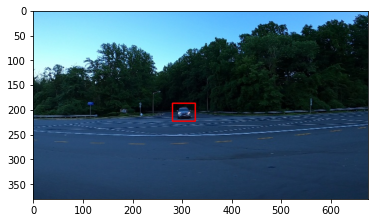

In [14]:
sample = cv2.imread('/content/drive/MyDrive/동아리_스터디_대외활동/GDSC/cardataset/archive/data/training_images/vid_4_1000.jpg')
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
point = box.iloc[0]
pt1 = (int(point['xmin']), int(point['ymax']))
pt2 = (int(point['xmax']), int(point['ymin']))
cv2.rectangle(sample, pt1, pt2, color=(255,0,0), thickness=2)
plt.imshow(sample)

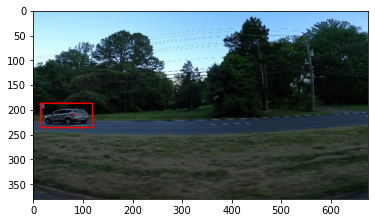

In [16]:
sample = cv2.imread('/content/drive/MyDrive/동아리_스터디_대외활동/GDSC/cardataset/archive/data/training_images/vid_4_10000.jpg')
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
point = box.iloc[1]
pt1 = (int(point['xmin']), int(point['ymax']))
pt2 = (int(point['xmax']), int(point['ymin']))
cv2.rectangle(sample, pt1, pt2, color=(255,0,0), thickness=2)
plt.imshow(sample)

# YOLO 구현

In [34]:
# Yolo 로드
net = cv2.dnn.readNet('/content/drive/MyDrive/동아리_스터디_대외활동/GDSC/yolo/yolov3.weights', '/content/drive/MyDrive/동아리_스터디_대외활동/GDSC/yolo/yolov3.cfg')
classes = []
with open("/content/drive/MyDrive/동아리_스터디_대외활동/GDSC/yolo/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
outout_layers = [layer_names[i-1] for i in net.getUnconnectedOutLayers()]

In [35]:
img = cv2.imread('/content/drive/MyDrive/동아리_스터디_대외활동/GDSC/cardataset/archive/data/training_images/vid_4_10000.jpg')
img = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
height, width, channels = img.shape

네트워크에서 이미지를 바로 사용할 수 없기 때문에 먼저 이미지를 Blob으로 변환해야한다.
Blob은 이미지에서 특징을 잡아내고, 크기를 조정하는데 사용된다.
YOLO가 허용하는 세 가지 크기
1. 320x320 : 작고 정확도는 떨어지지만 속도 빠름
2. 609x609: 정확도는 더 높지만 속도 느림
3. 416x416: 중간

In [36]:
blob = cv2.dnn.blobFromImage(img, 1/256, (416,416),(0,0,0), swapRB=True, crop=False)
net.setInput(blob)

# outs는 출력으로 탐지된 객체에 대한 모든 정보와 위치를 제공한다.
outs = net.forward(outout_layers)
outs

(array([[0.04785139, 0.03000319, 0.23776454, ..., 0.        , 0.        ,
         0.        ],
        [0.05149436, 0.03608405, 0.22841617, ..., 0.        , 0.        ,
         0.        ],
        [0.05262944, 0.02138276, 1.0705212 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.95576704, 0.9491927 , 0.383241  , ..., 0.        , 0.        ,
         0.        ],
        [0.9655768 , 0.9616919 , 0.27953443, ..., 0.        , 0.        ,
         0.        ],
        [0.97032523, 0.96484363, 0.7817919 , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.02865467, 0.03231633, 0.06244447, ..., 0.        , 0.        ,
         0.        ],
        [0.0226341 , 0.03205082, 0.157981  , ..., 0.        , 0.        ,
         0.        ],
        [0.02774061, 0.01993154, 0.09602206, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9736996 , 0.97619736, 0.05005315, ..., 0.        , 0.        ,
         0.        

In [38]:
# 정보를 화면에 표시
class_ids = []
confidences = []
boxes = []
for out in outs:
  for detection in out:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > 0.5:
      # object detection
      center_x = int(detection[0] * width)
      center_y = int(detection[1] * height)
      w = int(detection[2] * width)
      h = int(detection[3] * height)
      # 좌표
      x = int(center_x - w / 2)
      y = int(center_y - h / 2)
      boxes.append([x, y, w, h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

- confidence 값이 1에 가까우면 정확도가 높아지고, 0에 가까우면 정확도가 떨어지지만 검출되는 객체 수가 많아진다.
- 위의 검출 과정에서 동일한 객체에 생기는 바운딩 박스가 많아지기 때문에 이를 제거하기 위한 코드 NMS가 필요하다.


In [42]:
# 겹치는 bounding box 제거
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

마지막으로 모든 정보를 추출하여 화면에 표시한다.
- Box: 감지된 개체를 둘러싼 사각형의 좌표
- Label: 감지된 물체의 이름
- Confidence: 0에서 1까지의 탐지에 대한

18 196 96 34


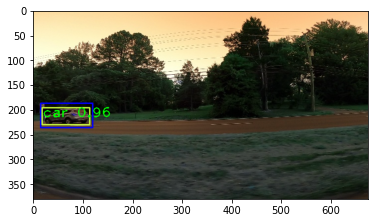

In [43]:
# 마지막으로 모든 정보를 추출하여 화면에 표시한다.
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(boxes), 3))

for i in indexes.flatten():
  x, y, w, h = boxes[i]
  print(x, y, w, h)
  label = str(classes[class_ids[i]])
  confidence = str(round(confidences[i], 2))
  color = colors[i]
  cv2.rectangle(img, (x, y), ((x+w), (y+h)), color, 2)
  cv2.putText(img, label + ' ' + confidence, (x, y+20), font, 2, (0, 255, 0), 2)

plt.imshow(img)

# 하나의 함수로 시각화 구현

In [64]:
# Yolo 로드
net = cv2.dnn.readNet('/content/drive/MyDrive/동아리_스터디_대외활동/GDSC/yolo/yolov3.weights', '/content/drive/MyDrive/동아리_스터디_대외활동/GDSC/yolo/yolov3.cfg')
classes = []
with open("/content/drive/MyDrive/동아리_스터디_대외활동/GDSC/yolo/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
outout_layers = [layer_names[i-1] for i in net.getUnconnectedOutLayers()]

In [80]:
def predict_yolo(img_path):
  # 이미지 가져오기
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  height, width, channels = img.shape

  # Blob은 이미지에서 특징을 잡아내고, 크기를 조정하는데 사용된다.
  blob = cv2.dnn.blobFromImage(img, 1/256, (416,416),(0,0,0), swapRB=True,
                               crop=False)
  net.setInput(blob)
  # outs는 출력으로 탐지된 객체에 대한 모든 정보와 위치를 제공한다.
  outs = net.forward(outout_layers)

  # 정보를 화면에 표시
  class_ids = []
  confidences = []
  boxes = []
  for out in outs:
    for detection in out:
      scores = detection[5:]
      class_id = np.argmax(scores)
      confidence = scores[class_id]
      if confidence > 0.5:
        # object detection
        center_x = int(detection[0] * width)
        center_y = int(detection[1] * height)
        w = int(detection[2] * width)
        h = int(detection[3] * height)
        # 좌표
        x = int(center_x - w / 2)
        y = int(center_y - h / 2)
        boxes.append([x, y, w, h])
        confidences.append(float(confidence))
        class_ids.append(class_id) 

  # 겹치는 bounding box 제거
  indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4) 

  # 마지막으로 모든 정보를 추출하여 화면에 표시한다.
  font = cv2.FONT_HERSHEY_PLAIN
  colors = np.random.uniform(0, 255, size=(len(boxes), 3))
  
  if len(indexes) > 0:
    for i in indexes.flatten():
      x, y, w, h = boxes[i]
      print(x, y, w, h)
      label = str(classes[class_ids[i]])
      confidence = str(round(confidences[i], 2))
      color = colors[i]
      cv2.rectangle(img, (x, y), ((x+w), (y+h)), color, 2)
      cv2.putText(img, label + ' ' + confidence, (x, y+20), font, 2, (0, 255, 0), 2)

    plt.imshow(img)  
  else:
    print('탐지된 물체가 없습니다.')

In [81]:
import glob
import random

# glob 모듈의 glob 함수는 사용자가 제시한 조건에 맞는 파일명을
# 리스트 형식으로 반환한다.
paths = glob.glob('/content/drive/MyDrive/동아리_스터디_대외활동/GDSC/cardataset/archive/data/testing_images/*.jpg')

214 200 100 30


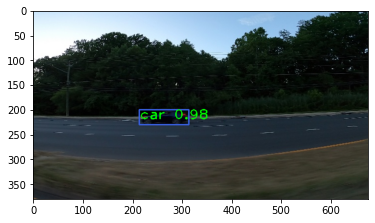

In [86]:
img_path = random.choice(paths)
predict_yolo(img_path)